<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/ESAA_YB_WEEK12_1_Dimension_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **차원 축소**

# 1. 차원 축소

- 차원 축소는 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차워의 데이터 세트를 생
성하는 것
- 일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, 희소(sparse)한 구조를 가짐
- 수백 개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어짐
- 피처가 많을 경우 개별 피처 간에 상관관계가 높을 가능성이 큼
- 선형 회귀와 같은 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 이로 인한 다중 공선성 문제로 모델의 예측 성능이 저하됨
- 이렇게 매우 많은 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터 해석 가능
- 차원 축소를 할 경우 학습 데이터의 크기가 줄어들어 학습에 필요한 처리 능력도 줄일 수 있음
- 일반적으로 차원 축소는 피처 선택(feature selection)과 피처 추출(feature extraction)로 나눔
    - 피처 선택 : 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선택
    - 피처 추출 : 기존 피처를 저차원의 중요 피처로 압축해서 추출
    > 이렇게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 피처를 **함축적**으로 더 잘 설명할 수 있는 **또 다른 공간으로 매핑해 추출**하는 것이기에 기존의 피처와는 완전히 다른 값이 됨



# 2. PCA (Principal Component Analysis)

## PCA 개요

- PCA는 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법
- PCA로 차원을 축소할 때는 기존 데이터의 정보 유실이 최소화되게 해야함
- 이를 위해서 PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소 = PCA의 주성분
- 즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주

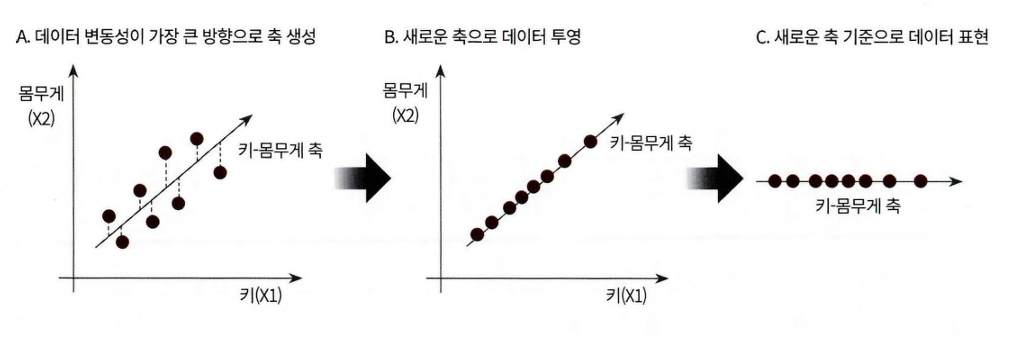

1.  첫번째 축 = 가장 큰 데이터 변동성(Variance) 기반
2.  두번째 축 = 이 벡터 축에 직각이 되는 벡터 기반
3.  세번째 축 = 다시 두번째 축과 직각이 되는 벡터 기반
> 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 축소됨

- 주성분 분석 = 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법
- PCA를 선형대수 관점에서 해석해 보면, 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것
- 이 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄
- 고윳값(eigenvalue)은 바로 이 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타냄

< 선형 변환 >
- 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것
- 특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념
- 이 행렬을 공간으로 가정하는 것

< 공분산 >
- 두 변수 간의 변동 의미
- 즉, 사람 키 변수를 x, 몸무게 변수를 y라 두면, 공분산 Cov(X,Y) > 0 은 X가 증가할 때 Y도 증가한다는 의미

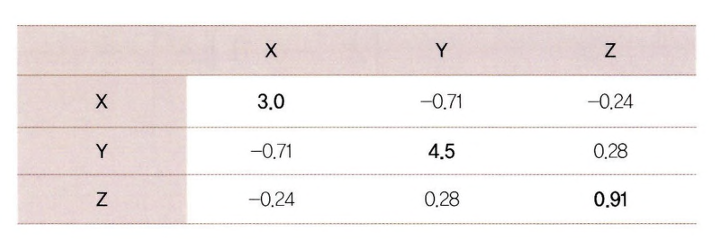

< 표 >
- 공분산 행렬에서 대각선 원소는 각 변수(X, Y, 2)의 분산을 의미
- 대각선 이외의 원소는 가능한 모든 변수 쌍 간의 공분산을 의미
- X, Y, Z의 분산은 각각 3.0, 4.5, 0.91
- X와 Y의 공분산은 -0.71, X와 Z의 공분산은 -0.24, Y와 Z의 공분산은 0.28

< 고유 벡터 >
- 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터
- Ax = ax : A는 행렬, x는 고유벡터, a는 스칼라 값
- 이 고유벡터는 여러 개가 존재하며, 정방 행렬은 최대 그 차원 수만큼의 고유벡터를 가질 수 있음
> ex. 2x2 행렬은 두 개의 고유벡터를, 3x3 행렬은 3개의 고유벡터를 가질 수 있음
- 고유벡터는 행렬이 작용하는 힘의 방향과 관계가 있기에 행렬을 분해하는 데 사용됨

< 공분산 행렬 >
- 정방행렬(Square Matrix) = 열과 행이 같은 행렬
- 대칭행렬(Symmetric Matrix) = 정방행렬 중, 대각 원소를 중심으로 원소 값이 대칭되는 행렬
> 항상 고유 벡터를 직교행렬(orthogonal matrix)로, 고유값을 정방 행렬로 대각화할 수 있음
    - 직교행렬 = 대각선 제외 원소가 다 0(대각행렬)이고, 대각 원소들이 다 1 또는 -1인 행렬
- 공분산 행렬 = 개별 분산값을 대각 원소로 하는 대칭행렬


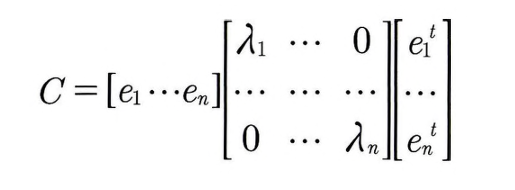

- ***공분산 C = 고유벡터 직교행렬 x 고유값 정방행렬 x 고유벡터 직교행렬의 T***
- e_i = 가장 분산이 큰 방향을 가진 고유벡터
- e_2는 e_1에 수직이며 다음으로 가장 분산이 큰 방향을 가진 고유벡터

**" 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA "**

1.  입력 데이터 세트의 공분산 행렬을 생성
2.  공분산 행렬의 고유벡터와 고유값을 계산
3.  고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출
4.  고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


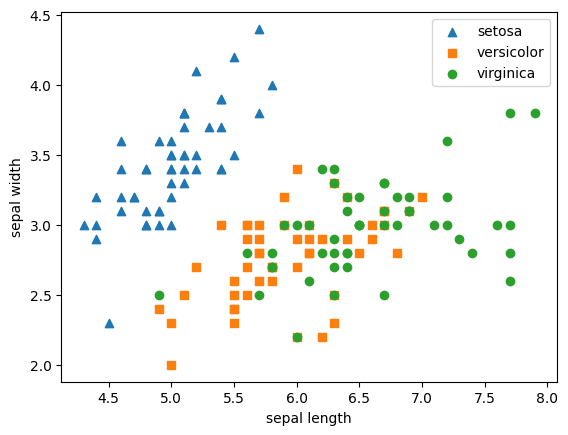

In [2]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미 표현
markers = ['^','s','o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2
# 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- Versicolor와 virginica의 경우는 sepal width와 sepal length 조건만으로는 분류가 어려운 복잡한 조건
- 따라서 PCA로 4개 속성을 2개로 압축한 뒤 2개의 PCA 속성으로 붓꽃 데이터의 품종 분포를 2차원으로 시각화할 것
- 하지만 PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받음
- 그래서 여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요

In [3]:
from sklearn.preprocessing import StandardScaler

# Target을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [4]:
from sklearn.decomposition import PCA

# n_components는 PCA로 변환할 차원의 수를 의미
pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [5]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


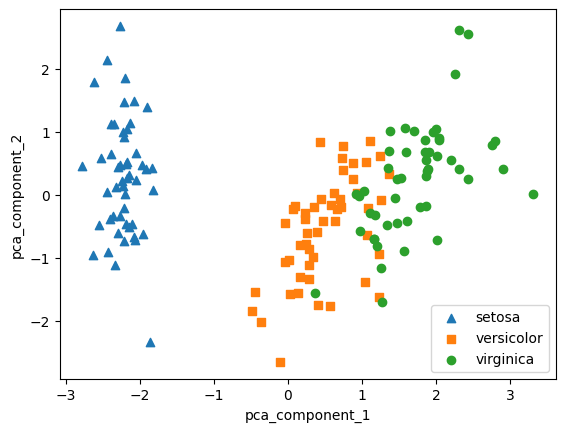

In [6]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미 표현
markers = ['^','s','o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2
# 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- PCA 변환을 수행한 PCA 객체의 explained_variance_ratio_ 속성은 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 제공

In [7]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- 첫번째 PCA 변환 요소인 pca_component_1이 전체 변동성의 약 72.9% 차지
- 두번째 pca_component_2가 약 22.8% 차지

> 즉, PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명 가능

In [8]:
# 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 후 결과 비교
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [9]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


- 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수밖에 없음
- 위 붓꽃 데이터의 경우는 4개의 속성이 2개의 변환 속성으로 감소하면서 예측 성능의 정확도가 원본 데이터 대비 약 8% 하락
- 8%의 정확도 하락은 비교적 큰 성능 수치의 감소지만, 4개의 속성이 2개로, 속성 개수가 50% 감소한 것을 고려한다면 PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음을 알 수 있음

## 신용카드 고객 데이터 세트

In [10]:
import google.colab as colab
colab.drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ESAA/default of credit card clients.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [12]:
# PAY_0 다음에 PAY_2 칼럼이 있으므로 PAY_0 칼럼을 PAY_1 으로 변경
# 'default payment next month' 칼럼은 칼럼명이 너무 길어서 'default'로 변경
df.rename(columns={'PAY_0': 'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']  # Target
X_features = df.drop('default', axis=1)  # Feature

<Axes: >

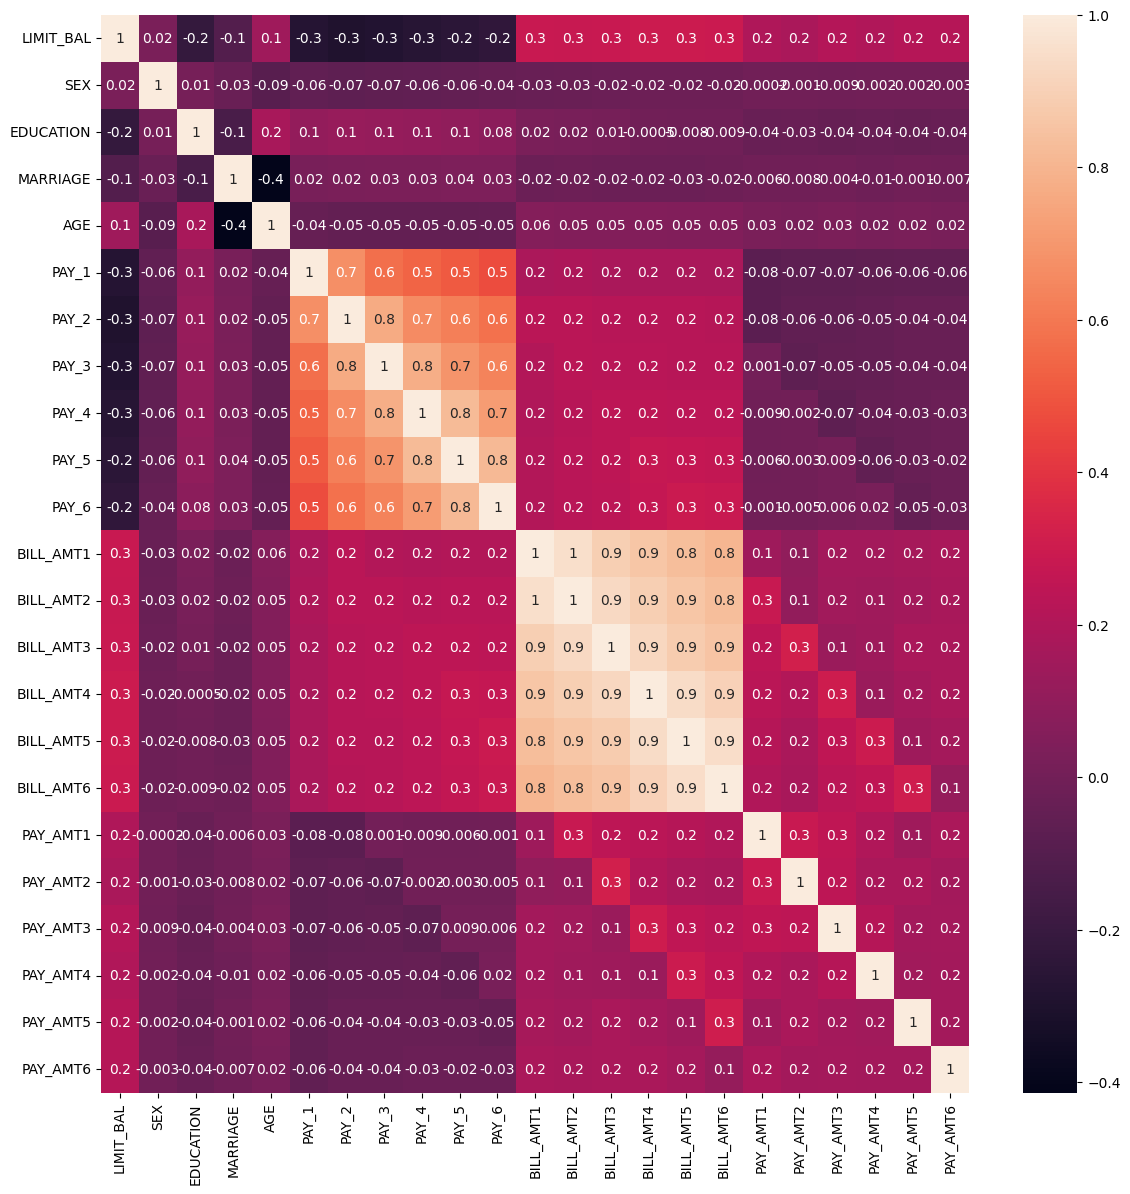

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

- BILL_AMT1 ~ BILL_AMT6 6개 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높음
- 이보다는 낮지만 PAY_1 ~ PAY_6까지의 속성 역시 상관도가 높음
- 이렇게 높은 상관도를 가진 속성들은 소수의 PCA만으로 자연스럽게 이 속성들의 변동성을 수용할 수 있음

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성 후, explained_variance_ratio_ 계산을 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:',pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


- 단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명할 수 있으며 특히 첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 이 6개 속성의 상관도가 매우 높음

In [15]:
# 원본과 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과 비교
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3안 경우의 개별 Fold세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3안 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도: {0:.4f}'.format(np.mean(scores_pca)))

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7912 0.7974 0.802 ]
PCA 변환 데이터 세트 평균 정확도: 0.7969


- 전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1~2% 정도의 예측 성능 저하만 발생
- 1~2%의 예측 성능 저하는 미비한 성능 저하로 보기는 힘들지만, 전체 속성의 1/4 정도만으로도 이 정도 수치의 예측 성능을 유지할 수 있다는 것은 PCA의 뛰어난 압축 능력을 잘 보여주는 것임

# 3. LDA (Linear Discriminant Analysis)

## LDA 개요

- 선형 판별 분석법으로 볼림
- PCA와 매우 유사
> 입력 데이터셋을 저차원 공간에 투영해 차원을 축소하는 기법
    - 차이점
    > LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하며 차원 축소
- 즉, PCA는 입력 데이터 변동성의 가장 큰 축을 찾지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음

- LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 **클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화**하는 방식으로 차원을 축소
> 즉, **클래스 간 분산은 최대한 크게** 가져가고, **클래스 내부의 분산은 최대한 작게** 가져가는 방식

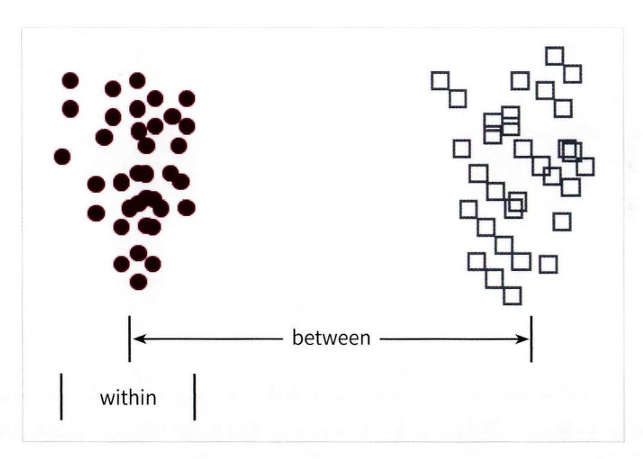

< LDA 구하는 방법 >

1.  클래스 내부와 클래스 간 분산 행렬 구함
> 이 두개의 행렬은 입력 데이터의 결정 값 클래스 별로 개별 피처의 평균 벡터(mean vector)를 기반으로 구함

2.  클래스 내부 분산 행렬은 S_w, 클래스 간 분산 행렬은 S_b라고 한다면, 다음 식으로 두 행렬을 고유 벡터로 분해 가능
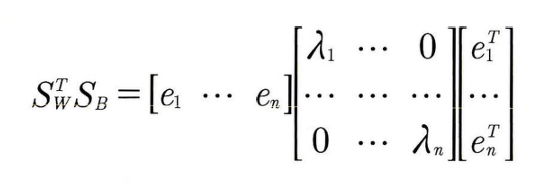

3.  고유값이 가장 큰 순으로 K개(LDA 변환 차수만큼) 추출

4.  고유값이 가장 큰 순으로 추출된 고유 벡터를 이용해 새롭게 입력 데이터 변환

## 붓꽃 데이터 세트에 LDA 적용하기

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
# 정규분포 스케일링
iris_scaled = StandardScaler().fit_transform(iris.data)

- LDA는 PCA와 달리, 비지도학습이 아닌 **지도학습**
- 따라서 클래스 결정값(Traget)이 변환 시 필요

In [18]:
# 2개의 컴포넌트로 LDA 변환
lda = LinearDiscriminantAnalysis(n_components=2)

# fit( ) 사용시 target 값 입력됨
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


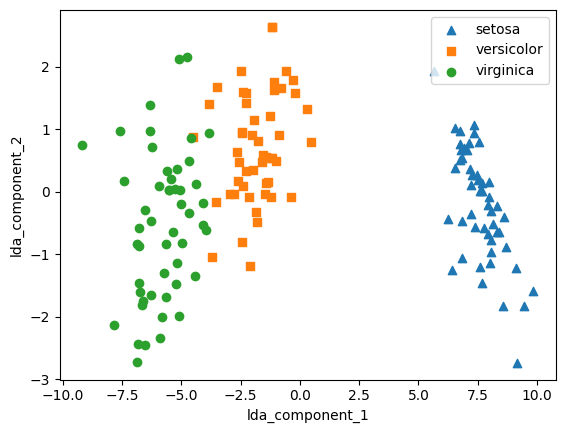

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미 표현
markers = ['^','s','o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2.
# 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

- PCA로 변환된 데이터와 좌우 대칭 형태로 많이 닮음

# 4. SVD (Singular Value Decomposition)

## SVD 개요

- PCA와 유사한 행렬 분해 기법
- PCA의 경우 정방행렬(즉, 행과 열의 크기가 같은 행렬)만을 고유벡터로 분해할 수 있지만, SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용 가능
> SVD = mxn 크기의 행렬 A를 다음과 같이 분해하는 것

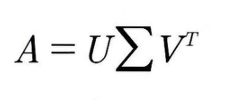

- SVD = 특이값 분해
- 행렬 U와 V에 속한 벡터는 특이벡터
> 모든 특이벡터(열 벡터)는 서로 직교 : 두 벡터의 곱이 0이면 직교함
- Σ = 대각행렬 : 대각에 위치한 값만 0이 아니고 나머지 값은 모두 0
> Σ가 위치한 0이 아닌 값이 행렬 A의 특이값
- 대각 성분 중 하나라도 0이면 특이행렬
> 특이값이 모여있는 게 특이행렬

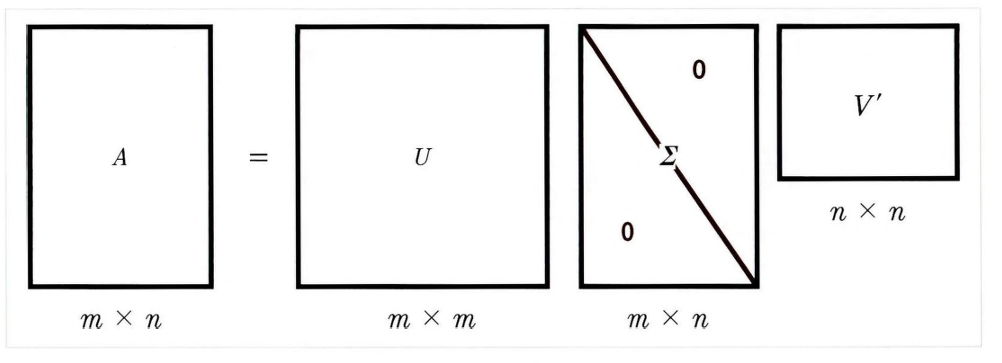

- 하지만 일반적으로는 Σ의 비대각인 부분과 대각원소에서 특이값이 0인 부분도 모두 제거하고 제거된 Σ에 대응되는 U와 V 원소도 함께 제거해 차원을 줄인 SVD 적용

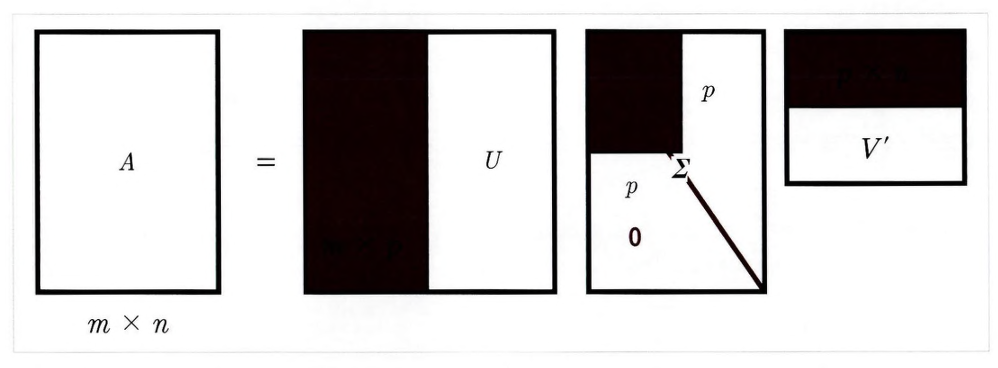

< Truncated SVD >
- Σ의 대각원소 중, 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것
- 일반적인 SVD는 보통 넘파이나 사이파이 라이브러리를 이용해 수행

In [20]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4X4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [22]:
# svd에 파라미터로 원본 행렬을 입력하면 U 행렬, Sigma 행렬, V 전치 행렬을 반환
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma,3))  # 대각에 위치한 값 제외 다 0이므로, 대각의 값만 1차원으로 표현
print('V transpose matrix:\n',np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [23]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)  # diag = 대각행렬 변환
a_ = np.dot(np.dot(U,Sigma_mat),Vt)  # dot = 행렬 곱
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


< row 간 의존성이 있을 경우 Sigma 값이 어떻게 변화는지 관찰 >

In [24]:
a[2] = a[0]+a[1]
a[3]=a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [25]:
# 다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


- Sigma 값 중 2개가 0으로 변함
> 즉, 선형 독립인 row 벡터의 개수가 2개라는 의미(행렬의 Rank = 2)

In [26]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])

# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape,Sigma_.shape, Vt_.shape)

# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_),Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


< Truncated SVD를 이용해 행렬 분해 >
- Σ 행렬에 있는 대각원소 즉, 특이값 중 상위 일부 데이터만 추출해 분해
- 인위적으로 더 작은 차원으로 분해하기에 원본 행렬을 정확하게 다시 복원할 수는 없음
> 그럼에도 상당한 수준으로 원본 행렬 근사 가능
- 원래의 차원의 차수에 가깝게 잘라낼수록(Truncate) 원본 행렬에 더 가깝게 복원 가능

In [30]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)

# full_matrices=False : 필요한 열/행만 남겨놓고 나머지 쓸데없는 0 부분은 만들지 않음
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:',Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

## 사이킷런 TruncatedSVD 클래스를 이용한 변환

- 사이킷런의 TruncatedSVD 클래스는 PCA 클래스와 유사하게 fit()과 transform()을 호출해 원본 데이터를 몇 개의 주요 컴포넌트(즉, Truncated SVD의 K 컴포넌트 수)로 차원을 축소해 변환

Text(0, 0.5, 'TruncatedSVD Component 2')

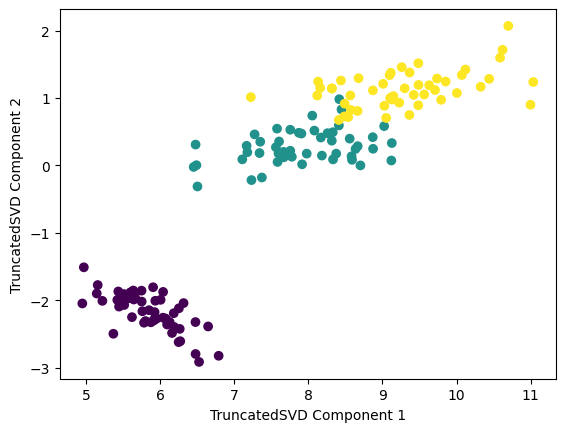

In [32]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

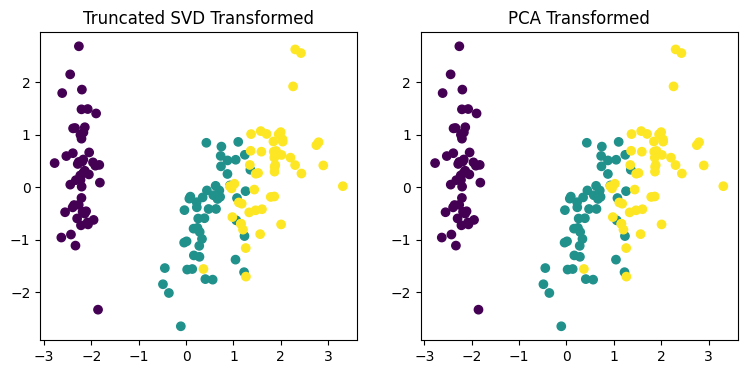

In [34]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1,ax2) = plt.subplots(figsize=(9,4),ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [36]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.33787526375077e-15
-9.020562075079397e-17


- 모두 0에 가까운 값이므로 2개의 변환이 서로 동일함을 알 수 있음
- 즉, 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행
- 이는 PCA가 SVD 알고리즘으로 구현됐음을 의미
- 하지만 PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하며 SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능

# 5. NMF (Non-Negative Matrix Factorization)

## NMF 개요

- Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low—Rank Approximation) 방식의 변형
- 원본 행렬 내의 모든 원소 값이 모두 양수(0 이상)라는 게 보장되면, 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법

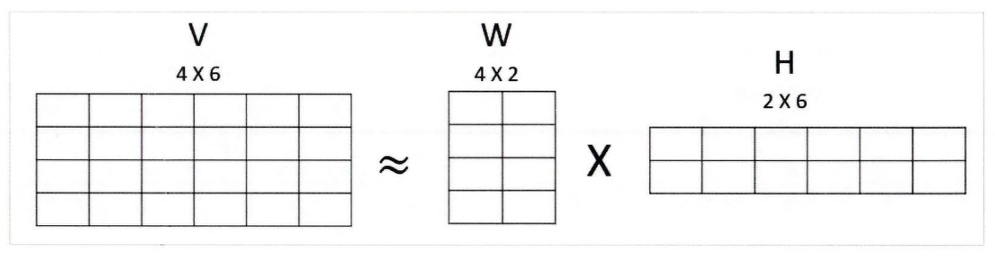

- 행렬 분해(Matrix Factorization)는 일반적으로 SVD와 같은 행렬 분해 기법을 통칭
- 행렬 분해를 하게 되면 W 행렬과 H 행렬은 일반적으로 **길고 가는 행렬 W(즉, 원본 행렬의 행 크기와 같고 열 크기 보다 작은 행렬)와 작고 넓은 행렬 H(원본 행렬의 행 크기보다 작고 열 크기와 같은 행렬)로 분해**
- 분해 행렬 W는 원본 행에 대해서 잠재 요소의 값이 얼마나 되는지에 대응
- 분해 행렬 H는 이 잠재 요소가 원본 열(즉, 원본 속성)로 어떻게 구성됐는지를 나타내는 행렬

/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

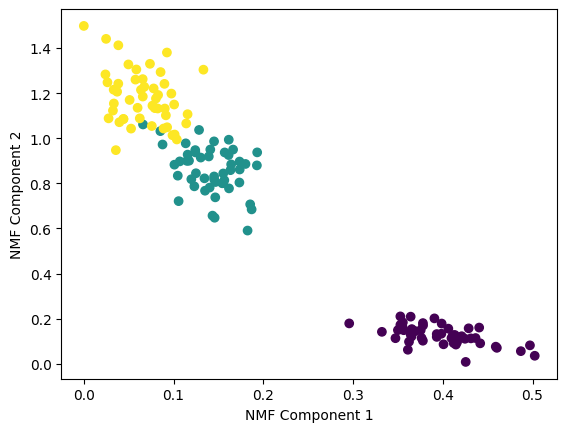

In [37]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0],y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')